# Communicate Data Findings

## By Mohammed Medhat

> This project was created using colab. I usd a 'requests' package to download the data to drive. Then in the notebook you will find unzipping the data, merging it, saving clean data into a dataframe, saving the dataframe, zipping it and then visualizations

In [2]:
# Mounting data from drive into Colab
# from google.colab import drive
# drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# import needed packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import glob
import os, shutil
import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##### We need to run this part once just for reading and merging the data files. After cleaning we can save clean data into another csv file or pickle it and start from there when we continue our work


First we unzip the downloaded files

In [ ]:
# import os, zipfile

# dir_name = '/content/drive/My Drive/Datasets/Ford GoBike System Data'
# extension = ".zip"

# os.chdir(dir_name)    # change directory from working dir to dir with files

# for item in os.listdir(dir_name): # loop through items in dir
#     if item.endswith(extension): # check for ".zip" extension
#         file_name = os.path.abspath(item) # get full path of files
#         zip_ref = zipfile.ZipFile(file_name) # create zipfile object
#         zip_ref.extractall(dir_name) # extract file to dir
#         zip_ref.close() # close file
#         os.remove(file_name) # delete zipped file

# shutil.rmtree('__MACOSX')

Then we read them into a data frame

In [ ]:
#parts = glob.glob("./*.csv")

#len(parts)

In [ ]:
# I used this cell only to read the data and now we don't need to run it again
# df_list = []
# converter = {'started_at' : 'start_time','ended_at' : 'end_time','start_station_latitude' : 'start_lat',
#              'start_station_longitude' : 'start_lng','end_station_latitude' : 'end_lat',
#              'end_station_longitude' : 'end_lng', 'member_casual' : 'user_type' }
# for part in parts:
#     df = pd.read_csv(part)
#     df.rename(columns = converter, inplace = True)
#     df_list.append(df)
# bike_df = pd.concat(df_list, axis=0, ignore_index=True, sort=False)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# set pandas option to display all columns for exploring purposes

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [ ]:
print(bike_df.shape)
bike_df.head()

(6483502, 18)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_lat,start_lng,end_station_id,end_station_name,end_lat,end_lng,bike_id,user_type,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,is_equity
0,80110.0,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96.0,Customer,NaN,NaN,NaN,NaN,NaN
1,78800.0,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88.0,Customer,NaN,NaN,NaN,NaN,NaN
2,45768.0,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094.0,Customer,NaN,NaN,NaN,NaN,NaN
3,62172.0,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831.0,Customer,NaN,NaN,NaN,NaN,NaN
4,43603.0,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167.0,Subscriber,NaN,NaN,NaN,NaN,NaN


## Now let's start cleaning data

In [ ]:
bike_df.duration_sec = pd.to_timedelta(bike_df.duration_sec)

In [ ]:
bike_df.start_time = pd.to_datetime(bike_df.start_time)
bike_df.end_time = pd.to_datetime(bike_df.end_time)
bike_df.duration_sec = bike_df.end_time - bike_df.start_time
bike_df.duration_sec = bike_df.duration_sec.dt.total_seconds()

In [ ]:
bike_df.shape

(6483502, 18)

In [3]:
bike_df.isna().sum()

In [ ]:
bike_df.drop(['start_station_name', 'end_station_name', 'bike_share_for_all_trip', 'rental_access_method', 'ride_id', 'rideable_type', 'is_equity'], axis = 1, inplace = True)

In [ ]:
bike_df.dropna(subset = ['end_lat', 'end_lng', 'start_station_id', 'end_station_id'], inplace = True)

In [ ]:
bike_df.user_type.value_counts()

Subscriber    3985882
Customer      1138476
casual         193099
member         170342
Name: user_type, dtype: int64

In [ ]:
bike_df.user_type.replace('member', 'Subscriber', inplace = True)
bike_df.user_type.replace('casual', 'Customer', inplace = True)
bike_df.user_type.value_counts()

Subscriber    4156224
Customer      1331575
Name: user_type, dtype: int64

In [ ]:
bike_df.shape

(5487799, 11)

In [ ]:
bike_df.isna().sum()

duration_sec             0
start_time               0
end_time                 0
start_station_id         0
start_lat                0
start_lng                0
end_station_id           0
end_lat                  0
end_lng                  0
bike_id             363441
user_type                0
dtype: int64

In [ ]:
bike_df[bike_df.bike_id.isna()].start_time.min() , bike_df[bike_df.bike_id.isna()].start_time.max()

(Timestamp('2020-04-01 00:00:38'), Timestamp('2020-08-31 23:57:21'))

In [ ]:
bike_df.drop('bike_id', axis = 1, inplace = True)

In [ ]:
bike_df.isna().sum()

duration_sec        0
start_time          0
end_time            0
start_station_id    0
start_lat           0
start_lng           0
end_station_id      0
end_lat             0
end_lng             0
user_type           0
dtype: int64

In [ ]:
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_lat,start_lng,end_station_id,end_lat,end_lng,user_type
0,80110.591,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74.0,37.776435,-122.426244,43.0,37.778768,-122.415929,Customer
1,78800.775,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284.0,37.784872,-122.400876,96.0,37.766210,-122.426614,Customer
2,45768.472,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245.0,37.870348,-122.267764,245.0,37.870348,-122.267764,Customer
3,62172.895,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60.0,37.774520,-122.409449,5.0,37.783899,-122.408445,Customer
4,43603.570,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239.0,37.868813,-122.258764,247.0,37.867789,-122.265896,Subscriber


In [ ]:
bike_df[bike_df.end_time < bike_df.start_time].count()

duration_sec        429
start_time          429
end_time            429
start_station_id    429
start_lat           429
start_lng           429
end_station_id      429
end_lat             429
end_lng             429
user_type           429
dtype: int64

In [ ]:
bike_df.drop(bike_df[bike_df.end_time < bike_df.start_time].index, axis=0, inplace = True)

In [ ]:
bike_df.count()

duration_sec        5487370
start_time          5487370
end_time            5487370
start_station_id    5487370
start_lat           5487370
start_lng           5487370
end_station_id      5487370
end_lat             5487370
end_lng             5487370
user_type           5487370
dtype: int64

In [ ]:
bike_df.isna().sum()

duration_sec        0
start_time          0
end_time            0
start_station_id    0
start_lat           0
start_lng           0
end_station_id      0
end_lat             0
end_lng             0
user_type           0
dtype: int64

In [ ]:
bike_df['start_year'] = bike_df.start_time.dt.year
bike_df['start_month'] = bike_df.start_time.dt.month
bike_df['start_day'] = bike_df.start_time.dt.day
bike_df['start_weekday'] = bike_df.start_time.dt.weekday
bike_df['end_year'] = bike_df.end_time.dt.year
bike_df['end_month'] = bike_df.end_time.dt.month
bike_df['end_day'] = bike_df.end_time.dt.day
bike_df['end_weekday'] = bike_df.end_time.dt.weekday

In [ ]:
bike_df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_lat', 'start_lng', 'end_station_id', 'end_lat', 'end_lng',
       'user_type', 'start_year', 'start_month', 'start_day', 'start_weekday',
       'end_year', 'end_month', 'end_day', 'end_weekday'],
      dtype='object')

In [ ]:
bike_df[bike_df.start_year != bike_df.end_year].count()

duration_sec        71
start_time          71
end_time            71
start_station_id    71
start_lat           71
start_lng           71
end_station_id      71
end_lat             71
end_lng             71
user_type           71
start_year          71
start_month         71
start_day           71
start_weekday       71
end_year            71
end_month           71
end_day             71
end_weekday         71
dtype: int64

In [ ]:
bike_df.drop('end_year', axis = 1, inplace = True)
bike_df.rename(columns = {'start_year' : 'year'}, inplace = True)

In [ ]:
bike_df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_lat', 'start_lng', 'end_station_id', 'end_lat', 'end_lng',
       'user_type', 'year', 'start_month', 'start_day', 'start_weekday',
       'end_month', 'end_day', 'end_weekday'],
      dtype='object')

In [ ]:
bike_df.drop(['start_time', 'end_time'], axis = 1, inplace = True)

In [ ]:
bike_df.columns

Index(['duration_sec', 'start_station_id', 'start_lat', 'start_lng',
       'end_station_id', 'end_lat', 'end_lng', 'user_type', 'year',
       'start_month', 'start_day', 'start_weekday', 'end_month', 'end_day',
       'end_weekday'],
      dtype='object')

In [ ]:
# Save clean data to a dataframe
bike_df.to_csv('../bike_data_clean.csv')

In [ ]:
# zip the dataframe to make it easier for download from drive
import bz2, lzma, zlib, zipfile
zipfile.ZipFile('/content/drive/My Drive/Datasets/bike_data_clean.zip', mode='w', compression=zipfile.ZIP_LZMA).write('/content/drive/My Drive/Datasets/bike_data_clean.csv')

In [4]:
bike_df = pd.read_csv('/content/drive/My Drive/Datasets/bike_data_clean.csv')

In [ ]:
bike_df.dtypes

Unnamed: 0            int64
duration_sec        float64
start_station_id    float64
start_lat           float64
start_lng           float64
end_station_id      float64
end_lat             float64
end_lng             float64
user_type            object
year                  int64
start_month           int64
start_day             int64
start_weekday         int64
end_month             int64
end_day               int64
end_weekday           int64
dtype: object

In [ ]:
(bike_df.start_station_id.mod(1) != 0 ).sum()

0

In [ ]:
bike_df['duration_sec'] = bike_df.duration_sec.astype('int64')
bike_df['start_station_id'] = bike_df.start_station_id.astype('int64')
bike_df['end_station_id'] = bike_df.end_station_id.astype('int64')


In [ ]:
bike_df.dtypes

Unnamed: 0            int64
duration_sec          int64
start_station_id      int64
start_lat           float64
start_lng           float64
end_station_id        int64
end_lat             float64
end_lng             float64
user_type            object
year                  int64
start_month           int64
start_day             int64
start_weekday         int64
end_month             int64
end_day               int64
end_weekday           int64
dtype: object

In [ ]:
bike_df.end_weekday.value_counts()

1    918301
3    914112
2    911815
4    861322
0    853342
5    543376
6    485102
Name: end_weekday, dtype: int64

In [ ]:
bike_df.count()

Unnamed: 0          5487370
duration_sec        5487370
start_station_id    5487370
start_lat           5487370
start_lng           5487370
end_station_id      5487370
end_lat             5487370
end_lng             5487370
user_type           5487370
year                5487370
start_month         5487370
start_day           5487370
start_weekday       5487370
end_month           5487370
end_day             5487370
end_weekday         5487370
dtype: int64

# Some questions to start with

* Is there a relationship between month, day of week, day of month and number of users or their rental duration?

* Are some stations popular as start stations or end stations?

* Is there a relationship between user type and rental duration?

* Are some locations have more rental start or end density than others?

* What are the usage differences between customers and subscribers

---
# **Visualizations**

---





In [23]:
bc = sns.color_palette()[0]

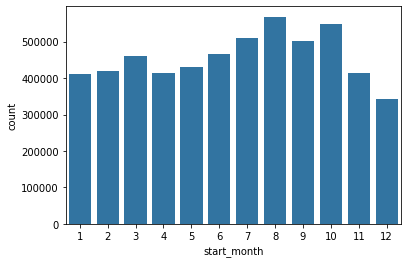

In [ ]:
sns.countplot(data = bike_df, x = bike_df.start_month, color = bc)

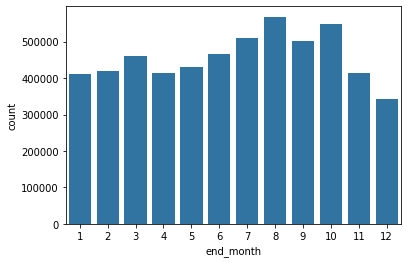

In [ ]:
sns.countplot(data = bike_df, x = bike_df.end_month, color = bc)

We notice a slightly high rent count in July and September and a little higher counts in August and October

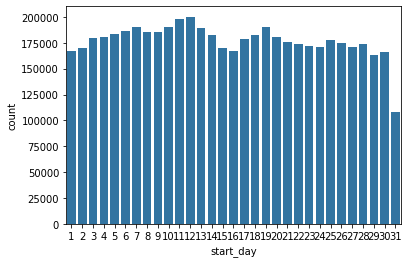

In [ ]:
sns.countplot(data = bike_df, x = bike_df.start_day , color = bc)

We notice that there's no significant variation in the counts of every day in the month except 31th but it's only less frequent day in months

In [ ]:
bike_df.start_day / bike_df.start_day.value_counts()

0               NaN
1          0.000186
2          0.000183
3          0.000172
4          0.000172
             ...   
5487365         NaN
5487366         NaN
5487367         NaN
5487368         NaN
5487369         NaN
Name: start_day, Length: 5487370, dtype: float64

In [ ]:
sns.countplot(data = bike_df, x = bike_df.start_weekday, color = bc)

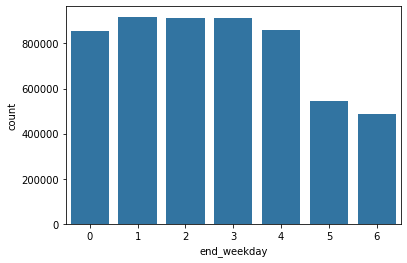

In [ ]:
sns.countplot(data = bike_df, x = bike_df.end_weekday, color = bc)

**We notice that Saturday and Sunday have significantly less rent counts**

Start day and end day are almost the same as the duration in most of the data is less than an hour

In [ ]:
bike_df['duration_sec'].mode()[0]

378

In [ ]:
plt.boxplot(x = bike_df.duration_sec, vert=False)

Oops, sounds like there is a large range of outliers so let's find the range where most of the data is

In [ ]:
bike_df.duration_sec.describe()

count    5.487370e+06
mean     9.292299e+02
std      7.869434e+03
min      0.000000e+00
25%      3.610000e+02
50%      5.780000e+02
75%      9.110000e+02
max      3.283732e+06
Name: duration_sec, dtype: float64

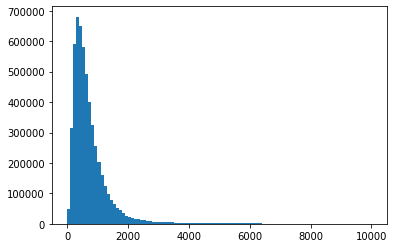

In [ ]:
bins = np.arange(0, bike_df.duration_sec.max() + 10, 100)[0:101]
plt.hist(data = bike_df, x = 'duration_sec', bins = bins);

As we see most of the data have duration less than 2000 seconds, to cover a bigger range let's use rows with duration 0:6000

In [ ]:
bike_df.shape[0] - (bike_df.duration_sec > 6000).sum(), (bike_df.duration_sec > 6000).sum()

(5437217, 50153)

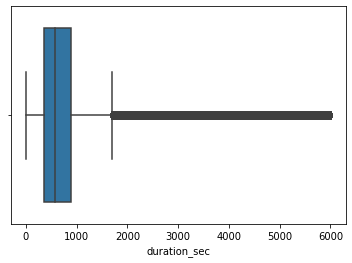

In [ ]:
sns.boxplot(x = bike_df.duration_sec[bike_df.duration_sec < 6000], color = bc)

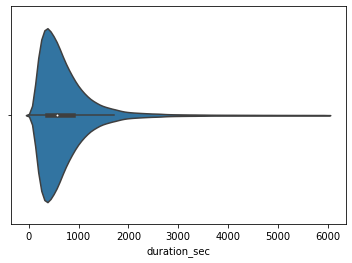

In [ ]:
sns.violinplot(x = bike_df.duration_sec[bike_df.duration_sec < 6000], color = bc)

**We notice that most of rent durations are less than 34 minutes and most of them are between 0 and 16 minutes. And the mode is about 5 to 6 minutes**

In [ ]:
bike_df.start_lat.describe()

count    5.487370e+06
mean     3.776978e+01
std      9.933019e-02
min      0.000000e+00
25%      3.777041e+01
50%      3.778095e+01
75%      3.779539e+01
max      4.551000e+01
Name: start_lat, dtype: float64

In [ ]:
bike_df.start_lng.describe()

count    5.487370e+06
mean    -1.223564e+02
std      1.369709e-01
min     -1.225091e+02
25%     -1.224133e+02
50%     -1.223985e+02
75%     -1.223768e+02
max      0.000000e+00
Name: start_lng, dtype: float64

In [ ]:
bike_df.start_lat.quantile(.75)

37.7953929373

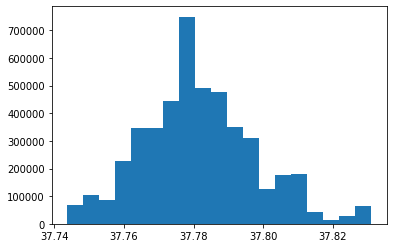

In [ ]:
bins = np.arange(bike_df.start_lat.quantile(.05), bike_df.start_lat.quantile(.9), (bike_df.start_lat.quantile(.9) - bike_df.start_lat.quantile(.05)) / 20);
plt.hist(data = bike_df, x = 'start_lat', bins = bins);

(array([-122.43 , -122.425, -122.42 , -122.415, -122.41 , -122.405,
        -122.4  , -122.395, -122.39 ]),
 <a list of 9 Text major ticklabel objects>)

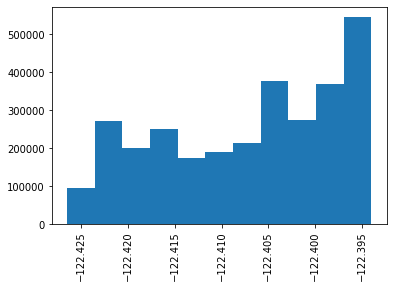

In [ ]:
bins = np.arange(bike_df.start_lng.quantile(.1), bike_df.start_lng.quantile(.7), (bike_df.start_lng.quantile(.7) - bike_df.start_lng.quantile(.1)) / 12);
plt.hist(data = bike_df, x = 'start_lng', bins = bins);
plt.xticks(rotation='vertical')

In [ ]:
start_lat_mean = bike_df.start_lat.mean()
start_lat_std = bike_df.start_lat.std()
bins = np.arange(start_lat_mean - 1.5 * start_lat_std,start_lat_mean + 1.5 * start_lat_std, start_lat_std / 20 );
plt.hist(data = bike_df, x = 'start_lat', bins = bins);

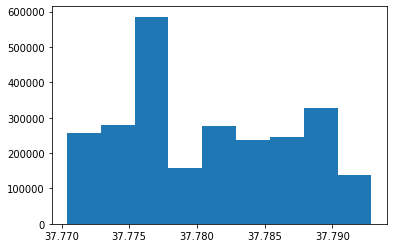

In [ ]:
start_lat_mean = bike_df.start_lat.mean()
start_lat_std = bike_df.start_lat.std()
bins = np.arange(bike_df.start_lat.describe()['25%'], bike_df.start_lat.describe()['75%'], (bike_df.start_lat.describe()['75%'] - bike_df.start_lat.describe()['25%'])/ 10 );
plt.hist(data = bike_df, x = 'start_lat', bins = bins);

In [22]:
lat_red = bike_df.start_lat.quantile(0.1), bike_df.start_lat.quantile(0.9)
lng_red = bike_df.start_lng.quantile(0.1), bike_df.start_lng.quantile(0.9)

In [23]:
bike_df_red = bike_df[(bike_df.start_lat > lat_red[0]) & (bike_df.start_lng > lng_red[0] ) & (bike_df.start_lat < lat_red[1]) & (bike_df.start_lng < lng_red[1] )  ]

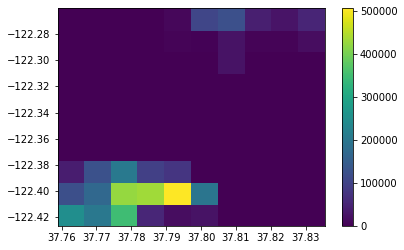

In [81]:
# plt.figure(figsize = (10,10))
plt.hist2d(data = bike_df_red, x = 'start_lat', y = 'start_lng');
plt.colorbar()

**We notice high density in a specific region. Let's have a closer look.**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


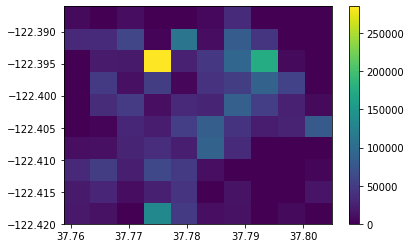

In [87]:
plt.hist2d(data = bike_df_red[bike_df.start_lng.between(-122.42, -122.38)], x = 'start_lat', y = 'start_lng');
plt.colorbar()
# bike_df.start_lng.between(-122.42, -122.38)

**A little closer**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


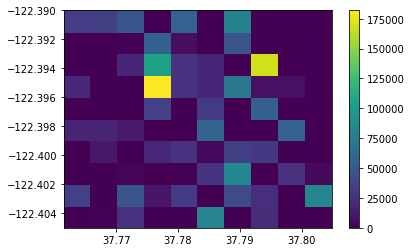

In [96]:
plt.hist2d(data = bike_df_red[bike_df.start_lng.between(-122.405, -122.390)], x = 'start_lat', y = 'start_lng');
plt.colorbar()
# bike_df.start_lng.between(-122.400, -122.390)

**We notice two areas with highest density**

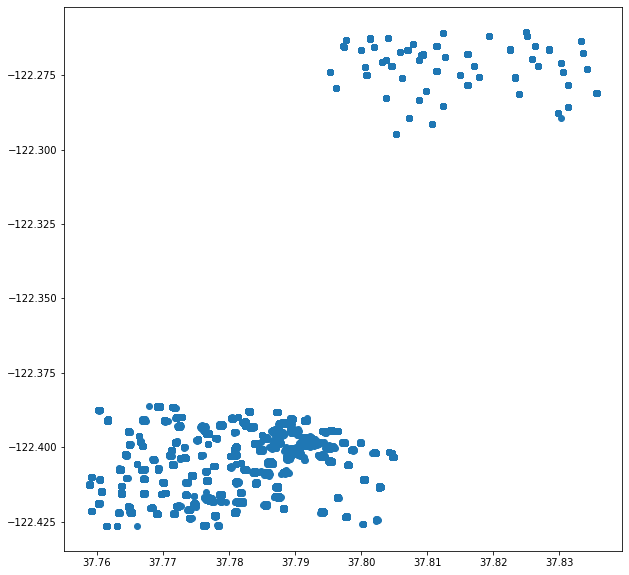

In [27]:
plt.figure(figsize = (10,10))
plt.scatter(data = bike_df_red, x = 'start_lng', y = 'start_lat')

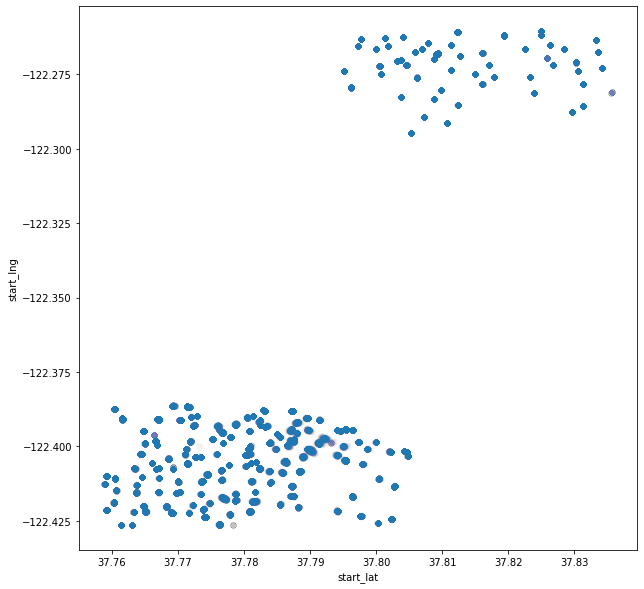

In [38]:
plt.figure(figsize = (10,10))
sns.regplot(data = bike_df_red, x = 'start_lng', y = 'start_lat', fit_reg= False, x_jitter = 0.0005, y_jitter = 0.0005, scatter_kws = {'alpha': 0.001})

We see that rentals are concentrated in two areas but it looks more informative in the previous heatmap

In [ ]:
sns.scatterplot(data= bike_df_red, x = 'start_lng', y = 'start_lat', hue = 'user_type')

This shows us the dominant user type across locations but it doesn't seem to have a significant observation

In [12]:
bike_df[bike_df.start_lat > 37.32 ].shape

(5484229, 16)

In [13]:
bike_df.shape

(5487370, 16)

In [21]:
bike_df.start_lat.describe()

count    5.487370e+06
mean     3.776978e+01
std      9.933019e-02
min      0.000000e+00
25%      3.777041e+01
50%      3.778095e+01
75%      3.779539e+01
max      4.551000e+01
Name: start_lat, dtype: float64

In [49]:
bike_df.start_station_id.value_counts()

58.0     102787
15.0      98761
30.0      95982
81.0      95100
67.0      85941
          ...  
428.0         3
484.0         2
449.0         1
65.0          1
420.0         1
Name: start_station_id, Length: 480, dtype: int64

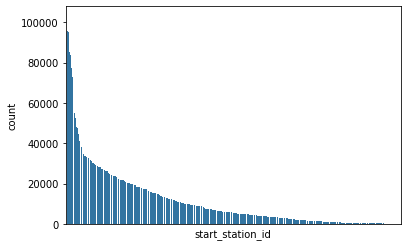

In [56]:
p = sns.countplot(x = bike_df.start_station_id, color = bc, order = bike_df.start_station_id.value_counts().index );
p.set(xticks = []);

**We notice that a significant number of stations have very low number of rentals**

In [69]:
start_counts = bike_df.start_station_id.value_counts()
start_counts[(start_counts < (start_counts.quantile(0.25) + 5)) & (start_counts > (start_counts.quantile(0.25) - 5))].index / (bike)

Float64Index([1.0], dtype='float64')

In [71]:
start_counts.quantile(0.25)

1373.5

In [54]:
bike_df.start_station_id.value_counts().describe()

count       480.000000
mean      11432.020833
std       15804.500178
min           1.000000
25%        1373.500000
50%        5630.500000
75%       16023.250000
max      102787.000000
Name: start_station_id, dtype: float64

In [ ]:
# bike_stats = ['start_weekday', 'end_lat', 'start_lng', 'end_lng']
g = sns.PairGrid(data = bike_df)
g.map_lower(plt.scatter)
g.map_diag(plt.hist)
g.map_upper(sns.boxplot)

In [97]:
bike_df.columns

Index(['Unnamed: 0', 'duration_sec', 'start_station_id', 'start_lat',
       'start_lng', 'end_station_id', 'end_lat', 'end_lng', 'user_type',
       'year', 'start_month', 'start_day', 'start_weekday', 'end_month',
       'end_day', 'end_weekday'],
      dtype='object')

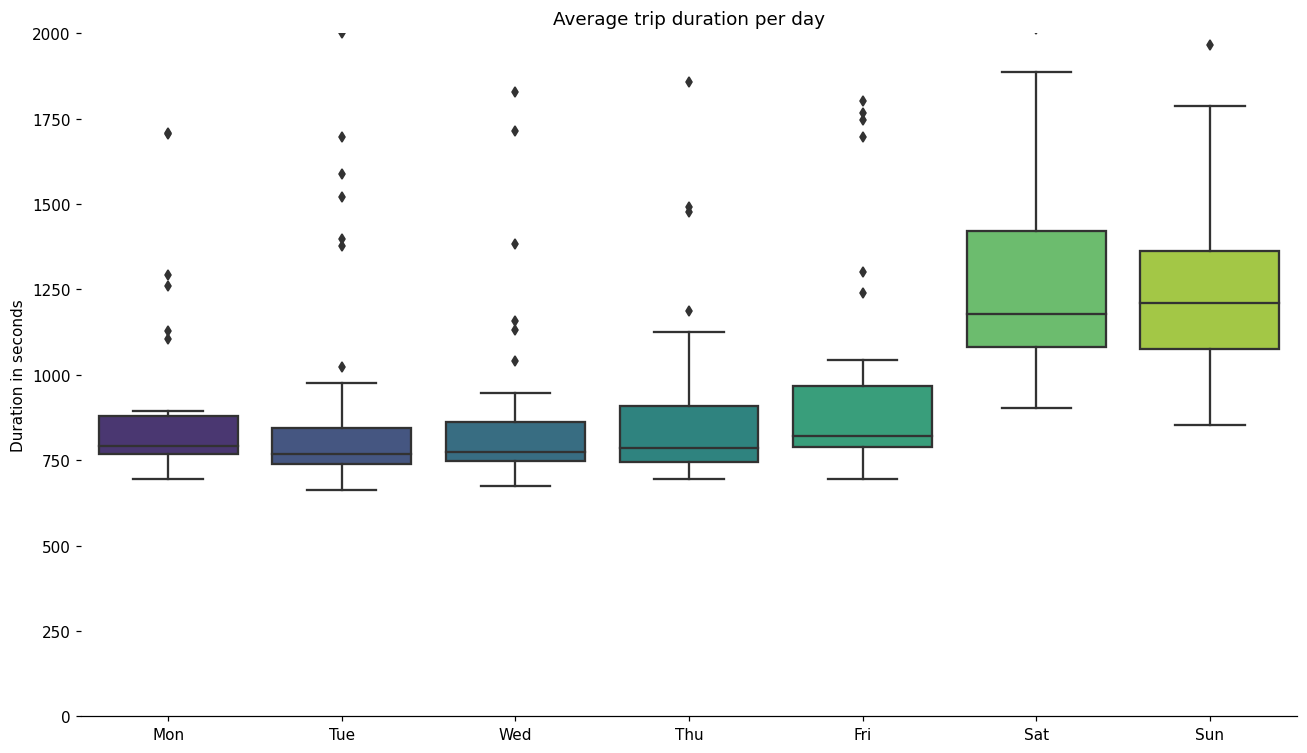

In [13]:
fig, ax = plt.subplots(figsize = (12,7), dpi = 110)
sns.boxplot(x = "start_weekday", y = "duration_sec", data = bike_df.groupby(['start_weekday', 'start_month', 'year'], as_index = False).mean(), palette = "viridis")

plt.tight_layout()
#cur_axes = plt.gca()
#cur_axes.axes.get_yaxis().set_visible(False)
sns.despine(fig, left = True)
plt.ylim((0, 2000))
plt.xlabel("")
plt.ylabel("Duration in seconds")
plt.title("Average trip duration per day")

ax.set(xticklabels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]);

**Despite what we have seen before that Saturday and Sunday have less rental counts, they have more rental durtion**

In [4]:
# g = sns.FacetGrid(data = bike_df, col = 'user_type')
# g.map(plt.hist)

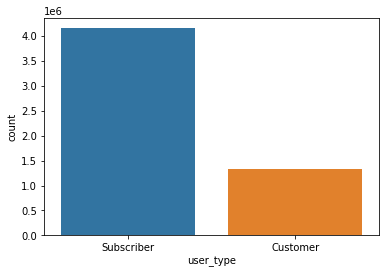

In [17]:
g = sns.countplot(data = bike_df, x = "user_type", order = bike_df.user_type.value_counts().index)

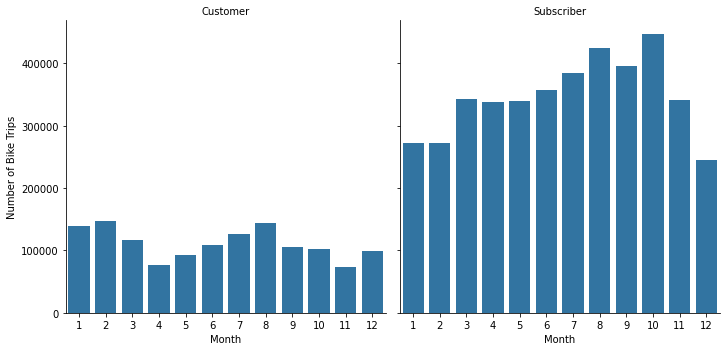

In [24]:
graph = sns.catplot(data=bike_df, x='start_month', col="user_type", kind='count', sharey = True, color = bc);

graph.set_axis_labels("Month", "Number of Bike Trips");
graph.set_titles("{col_name}")

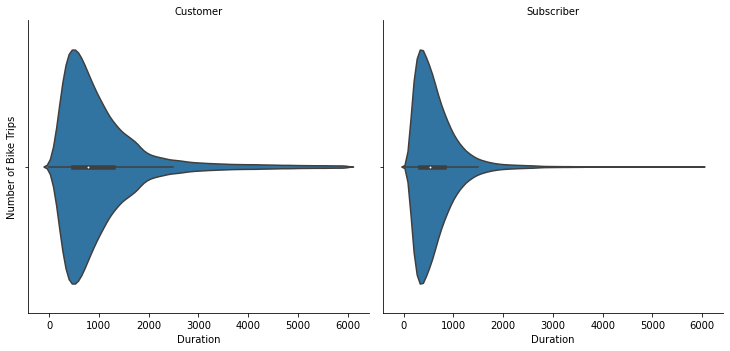

In [32]:
graph = sns.catplot(data=bike_df[bike_df.duration_sec < 6000], x='duration_sec', col="user_type", kind='violin', sharey = True, color = bc);

graph.set_axis_labels("Duration", "Number of Bike Trips");
graph.set_titles("{col_name}")